# CALCULO_AJUSTES_COMSOL 
Calcula los ajustes de scattering de clusters y vesículas usando los datos de Comsol
2018 Infor, AOCG

In [1]:
from __future__ import print_function, division

%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

%config InlineBackend.figure_format = 'png'

from pprint import  pprint

In [2]:
from phyton_optics import sp, plt, mm, um, nm, degrees
from scipy import linspace

In [3]:
# Parámetros generales
r = linspace(20,200,19); # Radio del cluster (nm)
c = linspace(0.1,0.5,21) # Concentración volumétrica relativa

## Calculo de vesiculas (solo dependen de la concentración)
### Scattering cross section vesiculas

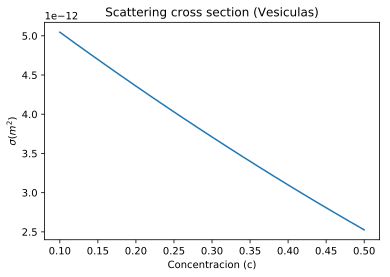

In [4]:
# Parámetros
Sv1 = 1.89802e-12
Sv2 = -7.44055e-12
Sv3 = 5.77093e-12
Sv = Sv1*c**2+Sv2*c+Sv3
plt.plot(c,Sv);
plt.title('Scattering cross section (Vesiculas)');
plt.xlabel('Concentracion (c)');
plt.ylabel('$\sigma (m^2)$');

### Coeficiente asimetria vesiculas

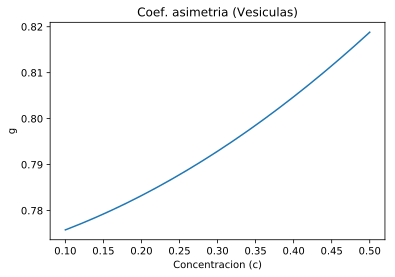

In [5]:
#Parametros
gv1 = 0.109884;
gv2 = 0.041627;
gv3 = 0.770523;
g = gv1*c**2+gv2*c+gv3;
plt.plot(c,g);
plt.title('Coef. asimetria (Vesiculas)');
plt.xlabel('Concentracion (c)');
plt.ylabel('g');

## Calculo para clusters (dependen del radio y concentracion)
### Calculo del scattering cross-section (vesiculas)

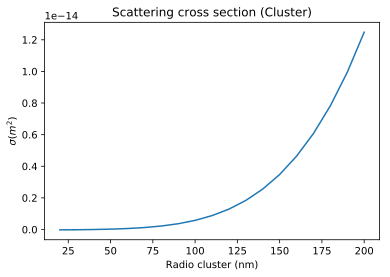

In [6]:
[R,C] = sp.meshgrid(r,c);

Sp00 = 1.24e-15;
Sp10 = 2.577e-15;
Sp01 = -5.059e-16;
Sp20 = 2.153e-15;
Sp11 = -1.162e-15;
Sp02 = 5.071e-17;
Sp30 = 8.025e-16;
Sp21 = -1.055e-15;
Sp12 = 1.834e-16;
Sp40 = 9.334e-17;
Sp31 = -3.366e-16;
Sp22 = 1.102e-16;

# Parametros normalizados (necesarios para Cross Section)
rcm = 112.5;
rcstd = 51.95;
Rn = (R-rcm)/rcstd;
clocm = 0.35;
clocstd = 0.08805;
Cn = (C-clocm)/clocstd;

# Calculo del scattering  cross section (como lo hago en la dll)
Stemp = Sp40;
Stemp = Stemp*Rn + Sp31*Cn + Sp30;
Stemp = Stemp*Rn + Sp22*Cn**2 + Sp21*Cn + Sp20;
Stemp = Stemp*Rn + Sp12*Cn**2 + Sp11*Cn + Sp10;
Stemp = Stemp*Rn + Sp02*Cn**2 + Sp01*Cn + Sp00;
Sc = Stemp;

# Representacion resultados
plt.plot(r,Sc[-6,:]);
plt.title('Scattering cross section (Cluster)');
plt.xlabel('Radio cluster (nm)');
plt.ylabel('$\sigma (m^2)$');
#cv = c[::5];
#text = cell(1,length(cv));
#for k in range(len(cv)):
#    text{k} = ['c = ' num2str(cv(k),3)];
#end
#plt.legend(text);

### Calcula el coeficiente  de asimetria (clusters)
Parameters for computing the anisotropy coefficient (fromn Alex's Comsol simulations)*/

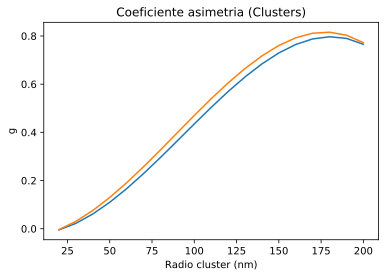

In [7]:
gp00 = -0.01276;
gp10 = -0.001197;
gp01 = -0.04586;
gp20 = 8.628e-5;
gp11 = 0.00237;
gp02 = 0.01374;
gp30 = -3.046e-7;
gp21 = -9.82e-6;
gp12 = -0.0002186;

# Computing the anysotropy coefficient*/
gtemp = gp30;
gtemp = gtemp*R + gp20 + gp21*C;
gtemp = gtemp*R + gp10 + gp11*C + gp12*(C**2);
gtemp = gtemp*R + gp00 + gp01*C + gp02*(C**2);
gc = gtemp;

# Representación gráfica
plt.plot(r,gc[0,:],r,gc[-1,:]);
plt.title('Coeficiente asimetria (Clusters)');
plt.xlabel('Radio cluster (nm)');
plt.ylabel('g');
#cv = [c(1) c(end)];
#text = cell(1,length(cv));
#for k=1:length(cv)
#    text{k} = ['c = ' num2str(cv(k),3)];
#end
#legend(text);